# 5 - Muitas Variáveis e os Waffles Espúrios

Nosso objetivo nessa parte é começar o processo da construção de modelos de regressões múltiplas e, assim, também começaremos a criar as bases para o `framework de inferências causais`.

Para iniciarmos a discussão iremos introduzir um exemplo empírico, ou seja, um exemplo baseado na experiência e observações, sejam elas baseadas em algum método (*metódicas*) ou não.

<img src="./images/waffle_house.jpeg" alt="Waffle House" width=1000 />

[Fonte](https://br.linkedin.com/company/waffle-house)


[Aula - Statistical Rethinking Winter 2019 Lecture 05](https://www.youtube.com/watch?v=e0tO64mtYMU)

A *waffle house* é uma cadeia de restaurantes com mais de $2000$ locais em $25$ estados nos EUA (mapa amarelo abaixo). A maioria das suas localizações está no Sul do país e é um item da cultural e regional norte americana. (*[wikipedia](https://en.wikipedia.org/wiki/Waffle_House)*). Uma das particularidades dessa rede de restaurantes é que eles trabalham 24 horas. Nunca fecham! Essa é a proposta de negócio deles.

Um outro fato importante e desagradável que se surge no sul dos EUA são os *Furacões*. Esses são causados pelas depressões tropicais climáticas do pais. Os restaurantes da rede Waffles são um dos únicos estabelecimentos que continuam abertos nesses períodos turbulentos. *Exceto quando esses furacões atingem uma de suas lojas.*

A rede é tão confiável que governadores dos EUA criaram o `waffle house index`, internamente na FEMA (*agência federal de gestão de emergências*). Usada como uma métrica informal com o nome da rede de restaurantes, pretendem  determinar o efeito das tempestades, como uma escala auxíliar para o planejamento de recuperação de um desastre. (*[waffle house index](https://en.wikipedia.org/wiki/Waffle_House_Index)*)

<img src="./images/WH_per_people.png" alt="waffle house map" width=900 />

Imagem - https://www.scottareynhout.com/blog/2017/10/7/waffle-house-map

Além dos desastres naturais, existem também muitas outras coisas acontecendo em grande escala no sul dos EUA, tal como **divórcios**!

No gráfico abaixo temos a indicação da quantidade de divórcios nos EUA. Observe o sul do país e compare com o mapa acima.

<img src="./images/WH_per_divorce.png" alt="Waffle House contry-level-marriage-divorce-data-2010" width=900 />

Imagem - https://www.bgsu.edu/ncfmr/resources/data/original-data/county-level-marriage-divorce-data-2010.html

Percebeu? 

Em ambos os mapas existem uma grande concentração, no extremo do sul do mapa, de restaurantes da rede Waffle House e, subindo mais ao norte do país, temos quantidades cada vez menores. O mesmo ocorre no mapa das *taxas de divórcios*, quando olhamos para os mesmos locais no mapa.

Podemos então fazer uma estimativa: `esses dados estão correlacionados entre si`. E podemos nos ser levados a pensar que quanto maior a concentração de restaurantes na região maior seria seria a taxa de divórcios.

E por que isso acontece? 

Pelo seguinte motivo: `Por nada`! 

Isso mesmo, nada!!!

Não existe nada que tenha uma relação direta na qual a quantidade de restaurantes da rede em alguma determinada região influencie casais a brigarem e tomarem a decisão de se separar! 

É estranho. É cômico. É intrigante. Isso é uma `Correlação Espúria`!

# Correlações Espúrias

Essas são as `correlações espúrias`, ou seja, `correlações sem certeza`; que não é verdadeira nem real; é hipotética!

Muita coisa está relacionada com as outras no mundo real. `Isso é a Natureza`!

Por exemplo, se quisermos, por qualquer motivo que seja, arrumar um "argumento" para enfraquecer a imagem da rede Waffle House, "podemos" usar essas correlações espúrias com um dos argumentos. Assim, nós iriamos expor na mídia a seguinte manchete: 

```{admonition} Breaking News:
Pesquisadores [da universidade xyz] indicam que: o aumento do número de restaurantes da rede Waffle House 
na região implica num aumento assustador no número de divórcios nessa mesma região!
```


Isso soa estranho, eu sei! Esse é apenas um exemplo extremo.

Mas, lá no fundo, esse tipo de pensamento não soa tão estranho no dia-a-dia...

Existem diversas correlações espúrias no mundo. Muita coisa tem correlação com muitas outras coisas.


```{admonition} Entretanto:
Essas correlações não implicam causalidade.
```

Mas para entendermos melhor, vamos ver mais alguns exemplos sobre essas correlações espúrias:


- O consumo de queijo tem uma correlação de $94.7\%$ com os acidentes fatais com o emaranhado do lençol de cama. 


- O consumo per capita de frango apresenta uma correlação de $89\%$ com a importação de petróleo.


- Os acidentes por afogamentos em piscina tem a correlação de $66\%$ com o número de filmes lançados pelo Nicolas Cage, por ano. Veja graficamente essa correlação abaixo:


<img src="./images/chart.jpeg" alt="Tyler Vigen spurious correlations" width=1000>




Percebeu?

Se o consumo de frango diminuísse, a importação provavelmente não sofreria nenhum impacto por essa causa. E, caso o consumo de queijo diminuir, também não haverá uma diminuição nos acidentes fatais das pessoas que estão dormindo em suas camas. E, como é esperado, se o Nicolas Cage se aposentar dos cinemas, os acidentes por afogamento continuarão constantes. 

```{tip}
Correlação não implica causalidade!
```



Por fim, ter mais lojas da rede Waffle House não `causa` mais divórcios na região.



----
Mais correlações espúrias, tais como essas acima, podem ser encontradas no site do [Tyler Vigen](https://www.tylervigen.com/spurious-correlations).


-----

Entendido essa parte, vamos ao objetivo desse capítulo.


# Regressão Múltiplas

Vamos ver como construir um modelo de regressão linear novamente. Mas dessa vez iremos ver também como se faz com  `múltiplas variáveis` e quais são suas implicações. 

## Prós e contras das múltiplas variáveis:

- A parte boa desse tipo de modelo é que as regressões múltiplas podem não só revelar correlações espúrias como também podem revelar associações escondidas que nós não faríamos normalmente, ou seja, não teríamos visto essas associações usando o modelo com uma simples variável preditora.


- Mas, por outro lado, podemos também adicionar variáveis explicativas aos modelos que contenham correlações espúrias à regressão múltipla e, podem também, esconder as algumas das reais associações que existem.


Então, como essas coisas geralmente não são bem explicadas, vamos detalhar todo o processo de construção de uma regressão múltipla, a seguir.

Quando construímos um modelo usando uma regressão múltipla, nós devemos ter uma estrutura mais profusa para pensar sobre as nossas decisões. Apenas *jogar* todas as variáveis explicativas dentro da regressão múltipla, como usualmente é feito, é o segredo para o fracasso da análise e nós não queremos fazer isso!

Para isso precisamos de uma estrutura mais ampla e rica para conseguirmos pensar e tomar melhores decisões. Essa estrutura é o `framework de inferência casual`.

Nessa parte iremos aprender do básico sobre inferência casual:

- Grafos acíclicos direcionados (DAGs - *Directed acyclic graphs*)


- Fork, pipes, colliders...


- Critério de Backdoor.

Já sabemos que o Waffle House não causa os divórcios. Mas o que causa os divórcios?

Já vimos no mapa acima que divórcios do sul do país tem uma taxa bem mais alta do que no restante mais ao norte. Existem muitos esforços para tentar identificar as causas e as taxas de divórcios. Sabemos que no sul tem uma predominância religiosa quando comparada ao restante do país. Isso deixa os cientistas com certas desconfianças.

Existem assim muitas coisas que estão correlacionadas com a taxa de divórcios. Uma delas é a `taxa de casamentos`. Também podemos usar essas informações para cada um dos outros $50$ estados do país. Todos eles têm uma `correlação positiva` da taxa de casamentos com a taxa de divórcios.

Um ponto importante nessa correlação é que *só pode acontecer um divórcio se houver o casamento*! 

Mas a correlação entre essas taxas podem ser também `correlações espúrias`. Assim como a correlação entre homicídos e divórcios são uma correlação espúria.

Pois uma taxa alta de casamentos pode indicar que a sociedade vê o casamento de modo favorável e isso pode significar taxas de divórcios mais baixas. Não necessariamente faz sentido, mas pode ser que as taxas de casamentos e de divórcios sejam correlações espúrias também. 

```{note}
- Correlação não implica Causalidade


- Causalidade não implica Correlação


- Causalidade implica em correlação condicional
```


Assim, precisamos mais do que apenas simples modelos! É necessário um estrutura mais robusta.


Mas, o que causa os divórcios? 

Vamos descobrir isso...

Existe outra variável que também é correlacionada com a variável `taxa de divórcio`, é a variável `idade mediana das pessoas que se casam, em cada estado`. Mas diferente da `taxa de casamento`, essa variável apresenta uma *correlação negativa*.

In [1]:
import numpy as np
import pandas as pd
import stan
import nest_asyncio
import matplotlib.pyplot as plt

In [2]:
# Definindo o plano de fundo cinza claro para todos os gráficos feitos no matplotlib
plt.rcParams['axes.facecolor'] = 'lightgray'

In [3]:
# Desbloqueio do asyncIO do jupyter
nest_asyncio.apply()

In [4]:
# Lendo os dados

df = pd.read_csv('./data/WaffleDivorce.csv', sep=';')
df.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


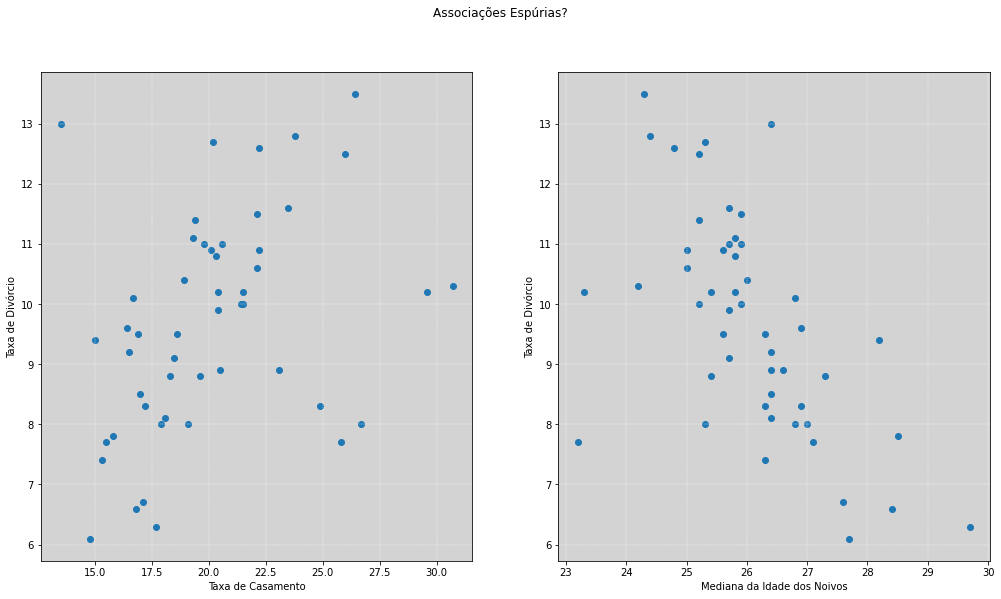

In [5]:
# ============================================
#  Plotando os dados das taxas de divórcios
# ============================================
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

plt.suptitle('Associações Espúrias?')

ax1.scatter(df.Marriage.values ,df.Divorce.values)
ax1.grid(ls='--', color='white', linewidth=0.4)
ax1.set_xlabel('Taxa de Casamento')
ax1.set_ylabel('Taxa de Divórcio')

ax2.scatter(df.MedianAgeMarriage.values ,df.Divorce.values)
ax2.grid(ls='--', color='white', linewidth=0.4)
ax2.set_xlabel('Mediana da Idade dos Noivos')
ax2.set_ylabel('Taxa de Divórcio')

plt.show()

Vamos construir modelos lineares simples para os dois gráficos acima.

In [6]:
# =======================================================
# Construindo um modelo linear simples:
#
#  taxa de divórcio ~ alpha + beta * taxa_casamento
# ========================================================
divorce_model1 = """
    data {
        int N;
        vector[N] divorce_rate;
        vector[N] marriage_rate;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0, upper=50> sigma;
    }
    
    model {
        divorce_rate ~ normal(alpha + beta * marriage_rate, sigma);
    }
"""

my_data = {
    'N': len(df.Divorce),
    'marriage_rate': df.Marriage.values,
    'divorce_rate': df.Divorce.values,
}

posteriori1 = stan.build(divorce_model1, data=my_data)
fit1 = posteriori1.sample(num_chains=4, num_samples=1000)

alpha_1 = fit1['alpha'].flatten()
beta_1 = fit1['beta'].flatten()
sigma_1 = fit1['sigma'].flatten()

Building: found in cache, done.


Messages from stanc:


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 4.3e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.6e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_ofo9jsra/model_ctssozv3.stan', line 15, column 8 to column 67)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 7.8e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.78 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 9.2e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.92 seconds.


  Adjust your expectations accordingly!


In [7]:
# ==============================================================
# Construindo um modelo linear simples:
#
#  taxa divorcio ~ alpha + beta * mediana da idade dos noivos
# ==============================================================

stan_model2 = """
    data {
        int N;
        vector[N] divorce_rate;
        vector[N] median_age_marriage;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0, upper=50> sigma;
    }
    
    model {
        divorce_rate ~ normal(alpha + beta * median_age_marriage, sigma);
    }
"""

my_data = {
    'N': len(df.Divorce),
    'divorce_rate': df.Divorce.values,
    'median_age_marriage': df.MedianAgeMarriage.values,
}

posteriori2 = stan.build(stan_model2, data=my_data)
fit2 = posteriori2.sample(num_chains=4, num_samples=1000)

alpha_2 = fit2['alpha'].flatten()
beta_2 = fit2['beta'].flatten()
sigma_2 = fit2['sigma'].flatten()

Building: found in cache, done.


Messages from stanc:


Sampling:   0%


Sampling:  10% (800/8000)


Sampling:  35% (2800/8000)


Sampling:  60% (4800/8000)


Sampling:  85% (6800/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 5.9e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.2e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_88rincga/model_dybmpobs.stan', line 15, column 8 to column 73)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 3.6e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_88rincga/model_dybmpobs.stan', line 15, column 8 to column 73)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 3.4e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.


  Adjust your expectations accordingly!


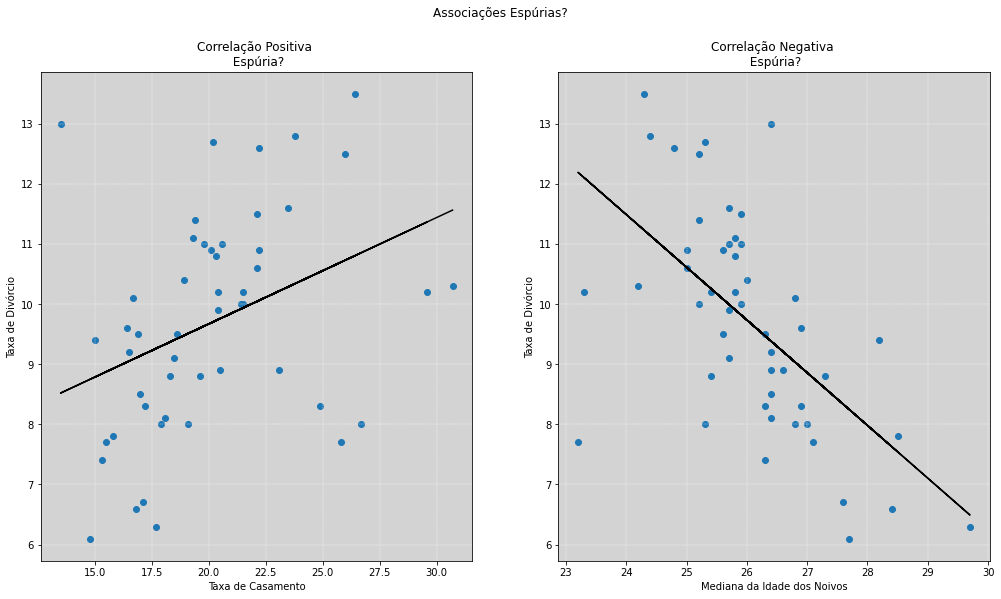

In [8]:
# ====================================================================
#  Plotando os dados das taxas de divórcios e suas estimativas médias
# ====================================================================
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

plt.suptitle('Associações Espúrias?')

# Gráfico de Divórcio x Casamento
ax1.scatter(df.Marriage.values ,df.Divorce.values)
ax1.plot(df.Marriage.values, 
         alpha_1.mean() + beta_1.mean() * df.Marriage.values,
         color='black')

ax1.grid(ls='--', color='white', linewidth=0.4)
ax1.set_xlabel('Taxa de Casamento')
ax1.set_ylabel('Taxa de Divórcio')
ax1.set_title('Correlação Positiva \n Espúria?')

# Gráfico de Divórcio x Mediana da Idade dos Casamentos
ax2.scatter(df.MedianAgeMarriage.values ,df.Divorce.values)
ax2.plot(df.MedianAgeMarriage.values, 
         alpha_2.mean() + beta_2.mean() * df.MedianAgeMarriage.values,
         color='black')

ax2.grid(ls='--', color='white', linewidth=0.4)
ax2.set_xlabel('Mediana da Idade dos Noivos')
ax2.set_ylabel('Taxa de Divórcio')
ax2.set_title('Correlação Negativa \n Espúria?')

plt.show()

Observando os dois gráficos acima, quais dessas correlações são `causas plausíveis`? 

No gráfico da esquerda, sabemos que a `taxa de casamento` tem uma associação com a `taxa de divórcio`, pois para se divorciar é necessário antes ter casado. Mas essa interpretação dos fatos pode estar contaminada pelo nosso senso comum e, assim, uma associação espúria, nos seria válida. Um dos motivos pra isso acontecer é que em locais que possuem maiores incentivos religiosos e incentivos para casamentos, pode não haver uma causalidade direta com o divórcio.

Já no gráfico à direita, que a `taxa de divórcio` está associada com `mediana das idades dos noivos`, apresentam uma associação negativa. O que pode nos levar a pensar que jovens, ao se casarem, tomam decisões muito emotivas e que isso também levaria a altas taxas de divórcios. Ou pode ser que essa seja uma associação espúria e nossas hipóteses não tenham sentido.

Assim, mesmo que nossas justificativas sejam bastante `verossímeis` a respeito do comportamento da Natureza do evento, não podemos afirmar que essas associações não sejam espúrias.

Se a identificação de associações espúrias no exemplo de filmes do *Nicolas Cage* `pareciam óbvias` de serem identificadas, agora, essas não parecem ser tão simples de se perceber veracidade.

Portanto, é necessário construirmos um ferramental que nos permita identificar com mais facilidade e com um maior grau de certeza se essas associações são reais ou são espúrias.

O que queremos fazer agora é colocar essas duas variáveis no mesmo modelo e entender o que isso faz e por que nos revela, quase certamente, que determinada variável é uma impostora.

## Múltiplas causas de divórcios

O que nós queremos saber é qual o valor de uma `variável preditora`, uma vez que nós conhecemos os valores das outras variáveis preditoras corretamente?

Todas variáveis preditoras são ,em alguma extensão, correlacionadas com as outras variáveis preditoras e também com a variável resposta, entretanto, elas têm `correlações parciais` que são reveladoras de informações adicionais dessa estrutura de correlação.

Para entendermos melhor, vamos exemplificar com nosso exemplo dos divórcios.

Gostariamos de aprender mais sobre o valor da `taxa de casamentos` uma vez que já conhecemos a `mediana da idade da taxa dos noivos`. 9:57